In [ ]:
# Importando modulo sqlite

import sqlite3

# Cria a conxão com o banco, se não existir é criado nesse momento

con = sqlite3.connect('escola.db')

In [ ]:
type(con)

In [ ]:
# Criando um cursor;
# Um cursor permite percorrer todos os registros em um conjunto de dados;

cur = con.cursor()

In [ ]:
type(cur)

In [ ]:
# Cria uma intrução SQL

sql_create = "create table cursos (id integer primary key, titulo varchar(100), catergoria varchar(140))"

In [ ]:
# Executando a instrução SQL no cursor;

cur.execute(sql_create)

In [ ]:
# Cria uma intrução SQL

sql_insert = "insert into cursos values (?,?,?)"

In [ ]:
# Dados

recset = [(1000, "Python Fundamentos", "Data Science"),
          (1002, "Big Data Fundamentos", "Big Data"),
          (1003, "Ciencia da Dados", "Analise de Dados")]

In [ ]:
# Executando a instrução SQL no cursor;

for rec in recset:
    cur.execute(sql_insert, rec)

In [ ]:
# Grava a transação

con.commit()

In [ ]:
sql_select = "select * from cursos"

In [ ]:
# Nesse momento todos os dados da tabela curso será armazenado no objeto cursor (cur)

cur.execute(sql_select)

In [ ]:
# Recupera todos os dados armazenado no objeto cursor (cur)

dados = cur.fetchall()

In [ ]:
for linha in dados:
    print("Id: %i, Titulo: %s, Categoria: %s \n" %(linha))

In [ ]:
# Gerando outros registros

recset = [(1001, "Hadoop", "Data Science"),
          (1004, "Python Fundamentos", "Data Science"),
          (1005, "MongoDB", "Big Data")]

#inserindo os registros

for linha in recset:
    cur.execute(sql_insert, linha)
    
# Gravando a transação

con.commit()

In [ ]:
# Seleciona todos os registros
cur.execute("select * from cursos")

#atribui à variavel dados todos os valores obtidos pelo cursor(cur)
dados = cur.fetchall()

#imprime os valores na tela
for linha in dados:
        print("Id: %i, Titulo: %s, Categoria: %s \n" %(linha))
    

In [ ]:
import sqlite3
# Criando conexao de DB
conn = sqlite3.connect('dsa.db')

# Criando cursor
c = conn.cursor()

# Criando função para criar tabela
def create_table():
    c.execute("CREATE TABLE IF NOT EXISTS produtos (id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, date TEXT, prod_name TEXT, valor REAL)")
    
# Função para inserir linha
def data_insert():
    c.execute("INSERT INTO produtos VALUES(10, '2016-05-02 14:32:11', 'teclado', 90)")
    conn.commit()
    c.close()
    conn.close()


In [ ]:
# Criando a tabela
create_table()

In [ ]:
# Inserindo a linha
data_insert()

INSERINDO DADOS COM VARIAVEIS

In [32]:
import sqlite3
import random
import time
import datetime
import matplotlib.pyplot as plt
%matplotlib notebook

# Criando conexao de DB
conn = sqlite3.connect('dsa.db')

# Criando cursor
c = conn.cursor()

# Criando função para criar tabela
def create_table():
    c.execute("CREATE TABLE IF NOT EXISTS produtos (id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, date TEXT, prod_name TEXT, valor REAL)")
    
# Função para inserir linha
def data_insert():
    c.execute("INSERT INTO produtos VALUES(10, '2016-05-02 14:32:11', 'teclado', 90)")
    conn.commit()
    c.close()
    conn.close()
    
# Usando variaveis para inserir dados
def data_insert_var():
    newdate = datetime.datetime.now()
    new_prod_name = "Monitor"
    new_valor = random.randrange(50,100)
    c.execute("INSERT INTO produtos (date, prod_name, valor) VALUES (?,?,?)",(newdate, new_prod_name,new_valor))
    conn.commit()
    
# Leitura de dados
def leitura_todos_dados():
    c.execute("SELECT * FROM produtos")
    for linha in c.fetchall():
        print(linha)
        
# Leitura de dados especificos
def leitura_registros():
    c.execute("SELECT * FROM produtos WHERE valor > 60.0")
    for linha in c.fetchall():
        print(linha)
        
# Leitura de coluna especifica
def leitura_coluna():
    c.execute("SELECT * FROM produtos")
    for linha in c.fetchall():
        print("Valores: %i" %linha[3])
        
# Atualiza dados
def atualiza_dados():
    c.execute("UPDATE produtos SET valor=70 WHERE valor=80.0")
    conn.commit()

# Remove dados
def remove_dados():
    c.execute("DELETE FROM produtos WHERE VALOR=96.0")
    conn.commit()
    
# Gerar graficos com dados
def gerar_graficos():
    c.execute("SELECT id, valor FROM produtos")
    ids = []
    valores = []
    dados =c.fetchall()
    for linha in dados:
        ids.append(linha[0])
        valores.append(linha[1])
    plt.bar(ids, valores)
    plt.show()

In [ ]:
# Gerando valores e inserindo na lista
for i in range(10):
    data_insert_var()
    time.sleep(1)

In [ ]:
leitura_todos_dados()

In [ ]:
leitura_registros()

In [ ]:
leitura_coluna()

In [ ]:
atualiza_dados()

In [ ]:
remove_dados()

<IPython.core.display.Javascript object>


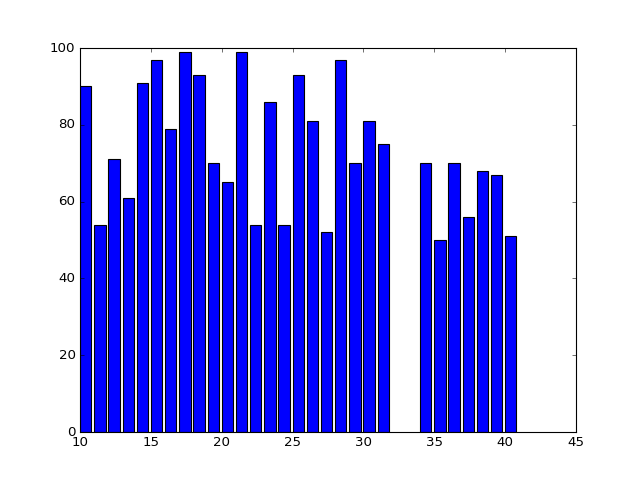

In [33]:
gerar_graficos()

In [34]:
# Encerrando a conxao com banco de dados
c.close()
conn.close()